<a href="https://colab.research.google.com/github/rebeldose/onop/blob/master/pet_breeds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 17.9MB/s 
     |████████████████████████████████| 1.1MB 17.9MB/s 
     |████████████████████████████████| 51kB 7.4MB/s 
     |████████████████████████████████| 194kB 60.1MB/s 
     |████████████████████████████████| 61kB 10.4MB/s 
Mounted at /content/gdrive


In [4]:
from fastai.vision.all import*
path = untar_data(URLs.PETS)
Path.BASE_PATH = path

In [5]:
path.ls()

(#2) [Path('images'),Path('annotations')]

In [6]:
(path/"images").ls()

(#7393) [Path('images/pug_189.jpg'),Path('images/newfoundland_110.jpg'),Path('images/Maine_Coon_52.jpg'),Path('images/leonberger_70.jpg'),Path('images/japanese_chin_23.jpg'),Path('images/wheaten_terrier_53.jpg'),Path('images/boxer_60.jpg'),Path('images/Maine_Coon_254.jpg'),Path('images/Egyptian_Mau_51.jpg'),Path('images/pug_171.jpg')...]

In [7]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

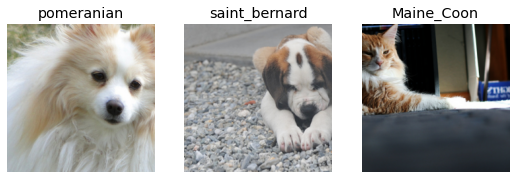

In [8]:
dls.show_batch(nrows=1,ncols=3)

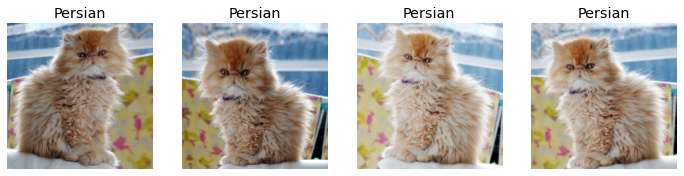

In [9]:
dls.show_batch(nrows=1,ncols=4,unique=True)

In [10]:
learn = cnn_learner(dls,resnet34,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [11]:
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.489278,0.327848,0.098106,01:09


epoch,train_loss,valid_loss,error_rate,time
0,0.489477,0.326815,0.094046,01:15
1,0.302435,0.233869,0.077131,01:15


In [12]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [13]:
x,y = dls.one_batch()

In [14]:
y

TensorCategory([17, 36, 36, 35, 15, 14, 19, 14, 12,  7,  7,  8,  3, 35, 22, 14, 28, 13, 27, 24,  3, 31,  8, 32, 35, 16, 22, 10, 33, 22,  6, 27, 36, 26, 31, 28, 30, 26, 12,  5,  9, 30, 16, 24,  8, 18,  8, 35,
        32, 26, 31, 15, 35, 35, 29, 14, 33, 22, 30, 27, 25, 35, 34, 36], device='cuda:0')